# **GAME RECOMMENDATION SYSTEM BASED ON GENRE**

# Data Collection

The **VGSales dataset** available on Kaggle contains detailed information about video game sales, spanning various platforms, genres, publishers, and regions, including North America, Europe, Japan, and others. The dataset has **16,598 entries** and includes key attributes such as:

- **Name**: Title of the game.
- **Platform**: Gaming console or platform.
- **Year**: Year of release.
- **Genre**: Type of game (e.g., Action, Sports).
- **Publisher**: Company responsible for the game's release.
- **Sales**: Global and regional sales data in millions of units.

This dataset is valuable for analysing trends in the gaming industry, identifying popular genres, understanding regional preferences, and more. For additional details or to access the dataset, visit its Kaggle page .

In [1]:
# prompt: download dataset from https://www.kaggle.com/datasets/kedokedokedo/vgsales?resource=download

# !pip install kaggle

!kaggle datasets download -d kedokedokedo/vgsales
!unzip vgsales.zip

Dataset URL: https://www.kaggle.com/datasets/kedokedokedo/vgsales
License(s): CC0-1.0
  0% 0.00/356k [00:00<?, ?B/s]
100% 356k/356k [00:00<00:00, 29.9MB/s]
Archive:  vgsales.zip
  inflating: vgsales.csv             


# Data Understanding for VGSales Dataset

1.  Loading the Dataset
    The dataset is imported using the pd.read_csv('vgsales.csv') function, which reads the data into a DataFrame. This serves as the starting point for exploration.

2.  Dropping Unnecessary Columns
    Columns such as Year, NA_Sales, JP_Sales, Other_Sales, Global_Sales, EU_Sales, Platform, and Publisher are removed using the df.drop() function. This is done to focus on the relevant features such as the game's name and genre for specific analyses.

3.  Descriptive Statistics
    The df.describe() function provides a statistical summary of numerical columns, including measures such as mean, standard deviation, minimum, and maximum values, helping identify data distribution and potential outliers.

4.  Dataset Structure
    The df.info() function gives an overview of the dataset's structure, including the total number of rows, column names, data types, and non-null counts, assisting in identifying missing data or inconsistencies.

This stage helps clean and refine the dataset, enabling better preparation for subsequent analysis.



In [2]:
# prompt: read vgsales.csv
import pandas as pd
df = pd.read_csv('vgsales.csv')
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...,...
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


In [3]:
# prompt: df drop 'Year', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'EU_Sales', 'Platform', 'Publisher'

df = df.drop(['Year', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'EU_Sales', 'Platform', 'Publisher'], axis=1)
df

,Rank,Name,Genre
0,259,Asteroids,Shooter
1,545,Missile Command,Shooter
2,1768,Kaboom!,Misc
3,1971,Defender,Misc
4,2671,Boxing,Fighting
...,...,...,...
16319,16565,Mighty No. 9,Platform
16320,16572,Resident Evil 4 HD,Shooter
16321,16573,Farming 2017 - The Simulation,Simulation
16322,16579,Rugby Challenge 3,Sports


In [4]:
# prompt: df describe

df.describe()

,Rank
count,16324.000000
mean,8291.508270
std,4792.043734
min,1.000000
25%,4135.750000
50%,8293.500000
75%,12439.250000
max,16600.000000


In [5]:
# prompt: df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    16324 non-null  int64 
 1   Name    16324 non-null  object
 2   Genre   16324 non-null  object
dtypes: int64(1), object(2)
memory usage: 382.7+ KB


## Missing value check

At this stage, the dataset is checked for missing values using df.isnull to ensure that no data points are incomplete. This step is crucial to maintain the integrity and quality of the data for further analysis.

In [6]:
# prompt: check missing value

df.isnull().sum()

,0
Rank,0
Name,0
Genre,0


## **Checking and Removing Duplicate Data in the VGSales Dataset**

1. **Identifying Duplicate Entries**  
   - The function `df.duplicated(subset=['Name']).sum()` calculates the total number of duplicate game names in the dataset based on the `Name` column. This helps quantify the extent of duplication.  
   - Printing duplicate entries using `print(df[df.duplicated(subset=['Name'])])` displays all rows with duplicated game names for manual inspection.

2. **Specific Analysis for Duplicate Patterns**  
   - A specific subset of duplicates can be examined, such as games with "Mario Bros" in their name, using `df[df['Name'].str.contains('Mario Bros', case=False, na=False)]`. This step highlights potential duplication for well-known game franchises.

3. **Removing Duplicate Data**  
   - The `df.drop_duplicates(subset=['Name'])` function removes duplicate entries based on the `Name` column, ensuring that only unique game titles remain in the dataset. This operation is crucial to maintaining data integrity for accurate analysis.  

This process ensures that duplicates are handled systematically, improving the reliability and quality of the dataset.

In [7]:
# prompt: remove duplicate Name

df.duplicated(subset=['Name']).sum()

4966

In [8]:
# prompt: show duplicate Name

import pandas as pd

# Display duplicate names.
print(df[df.duplicated(subset=['Name'])])

        Rank                      Name     Genre
92       702               Mario Bros.  Platform
95      1811               Donkey Kong  Platform
97      1863                    Popeye  Platform
117     1640                   Pac-Man    Puzzle
133     4729                   Dig Dug    Puzzle
...      ...                       ...       ...
16315  16533  Sébastien Loeb Rally Evo    Racing
16316  16534             Hitman (2016)    Action
16319  16565              Mighty No. 9  Platform
16320  16572        Resident Evil 4 HD   Shooter
16322  16579         Rugby Challenge 3    Sports

[4966 rows x 3 columns]


In [9]:
# prompt: show all Mario Bros.

import pandas as pd

# Assuming the dataframe 'df' is already loaded as in the provided code.
mario_games = df[df['Name'].str.contains('Mario Bros', case=False, na=False)]
mario_games

,Rank,Name,Genre
57,1165,Mario Bros.,Platform
92,702,Mario Bros.,Platform
122,2,Super Mario Bros.,Platform
139,574,Super Mario Bros.: The Lost Levels,Platform
173,23,Super Mario Bros. 3,Platform
174,97,Super Mario Bros. 2,Platform
1644,201,Super Mario Bros.,Platform
3636,183,Super Mario Bros. 3,Platform
4472,1353,Classic NES Series: Super Mario Bros.,Platform
4655,4590,Famicom Mini: Super Mario Bros. 2,Platform


In [10]:
df = df.drop_duplicates(subset=['Name'])
df

,Rank,Name,Genre
0,259,Asteroids,Shooter
1,545,Missile Command,Shooter
2,1768,Kaboom!,Misc
3,1971,Defender,Misc
4,2671,Boxing,Fighting
...,...,...,...
16314,16477,Total War Attila: Tyrants & Kings,Strategy
16317,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,Action
16318,16558,Codename: Panzers Complete Collection,Strategy
16321,16573,Farming 2017 - The Simulation,Simulation


## **Univariate Exploratory Data Analysis: Genre Distribution**

1. This analysis focuses on examining the distribution of video game genres in the dataset. The visualisation uses a bar chart to display the frequency of each genre, providing insights into the most and least represented genres.

2. The purpose of this approach is to explore the frequency distribution of the `Genre` column and identify dominant genres in the dataset.

3. The bar chart displays the number of games for each genre. Genres with the highest frequency appear prominently, highlighting trends in game development and market preferences.

4. This univariate analysis offers a simple yet effective way to summarise the genre distribution and forms a foundational step for deeper analysis of trends within the video game industry.

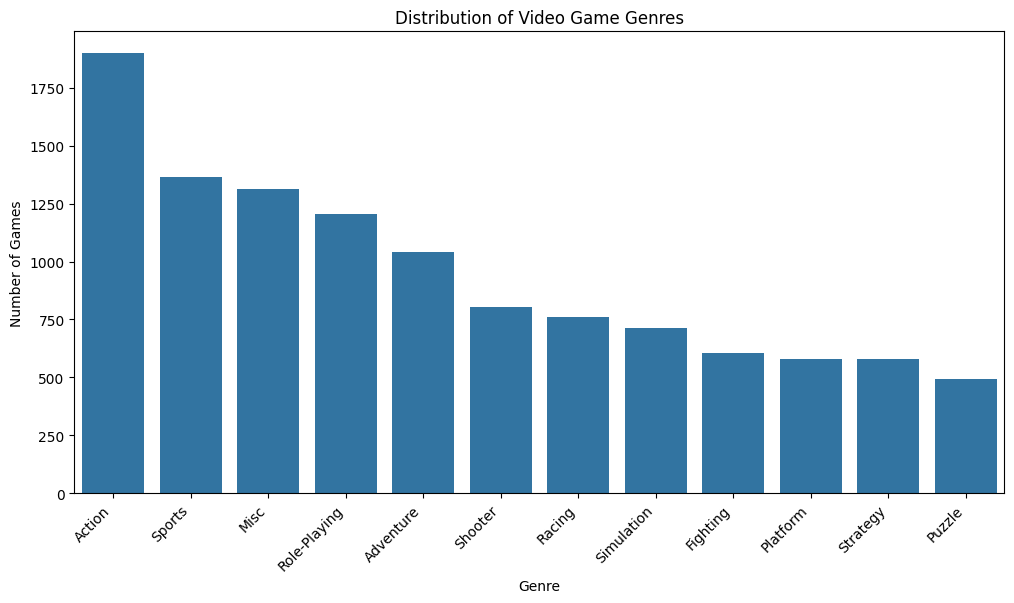

In [11]:
# prompt: show the graph of the Genre

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the 'Genre' column

plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Distribution of Video Game Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

# Modelling : recommendation model based on content

1.    TF-IDF Vectorisation
      -  The TfidfVectorizer transforms the Genre column into a matrix of TF-IDF features.
      -  Each unique genre word is treated as a feature, and the resulting matrix captures the importance of each genre word across games.
      -  The output is a sparse matrix with dimensions (number of games, number of unique genre words).

2.    Cosine Similarity Calculation
      -  Cosine Similarity measures the similarity between games based on their TF-IDF vectors.
      -  A similarity matrix is created where each value represents the similarity score between two games.
      -  The resulting DataFrame enables fast lookups for games with the most similar genres.

3.    Game Recommendation Function
      -  A function, recommend_games_with_genre, accepts a game's name and returns the top 5 recommended games along with their genres and similarity scores.
      -  If the input game is not found, an error message is displayed.

## TF IDF Vectorizer based on Genre

In [12]:
# prompt: create TF IDF Vectorizer based on Genre

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tf = TfidfVectorizer()
tf.fit(df['Genre'])
tf.get_feature_names_out()


array(['action', 'adventure', 'fighting', 'misc', 'platform', 'playing',
       'puzzle', 'racing', 'role', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

In [13]:
tfidf_matrix = tf.fit_transform(df['Genre'])
tfidf_matrix.shape

(11358, 13)

In [14]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [15]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df.Name
).sample(10, axis=0)


,action,adventure,fighting,misc,platform,playing,puzzle,racing,role,shooter,simulation,sports,strategy
Name,,,,,,,,,,,,,
Jikkyou Powerful Pro Yakyuu 9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
Aqua Panic!,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
Zoo Quest: Puzzle Fun!,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
Broken Sword: Shadows of the Templars - The Director's Cut,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Buzz! The Music Quiz,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Last Escort: Club Katze,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Bakumatsu Renka: Karyuu Kenshi-den,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Breath of Fire: Dragon Quarter,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0,0.0,0.0,0.0
Um Jammer Lammy,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Cosine similarity calculation

In [16]:
# prompt: create cosine similarity of tfidf_matrix

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim



array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
# Create a pandas DataFrame for better visualization (optional)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Name'], columns=df['Name'])

# Show 5 similarity score per game
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Name,Bae Yong-joon to Manabu Kankokugo DS,Harvest Moon: Sunshine Islands,Bionic Commando,Disney's Aladdin in Nasira's Revenge,Cursed Mountain
Name,,,,,
Pokemon Gold/Pokemon Silver,0.0,0.0,0.0,0.0,0.0
Wayne Gretzky's 3D Hockey '98,0.0,0.0,0.0,0.0,0.0
JoJo's Bizarre Adventure: All Star Battle,0.0,0.0,0.0,0.0,0.0
Tales of the World: Radiant Mythology 2,0.0,0.0,0.0,0.0,0.0
Hurry Up Hedgehog!,0.0,0.0,0.0,0.0,0.0


## Game Recommendation Function

In [18]:
chosen_game = 'Mario Bros.'

In [19]:
# Show the genre of the chosen game
print(f"The genre of '{chosen_game}' is: {df[df['Name'] == chosen_game]['Genre'].iloc[0]}")


The genre of 'Mario Bros.' is: Platform


In [20]:
# prompt: create a function that can recommend the game similar in form of dataframe and show the genre

def recommend_games_with_genre(game_name, cosine_sim_df, df):
    """
    Recommends similar games based on genre and displays genre information.

    Args:
        game_name: The name of the game to find recommendations for.
        cosine_sim_df: DataFrame of cosine similarities between games.
        df: The original DataFrame containing game information.

    Returns:
        A DataFrame of recommended game names with their genres and similarity scores,
        or an error message if the game is not found.
    """
    try:
        # Get the similarity scores for the given game
        similarity_scores = cosine_sim_df[game_name]

        # Sort the games by similarity score in descending order
        similar_games = similarity_scores.sort_values(ascending=False)

        # Exclude the input game itself from the recommendations
        similar_games = similar_games.drop(game_name)

        # Get the top 5 most similar games
        top_5_recommendations = similar_games.head(5)

        # Create a DataFrame for the recommendations with genre information
        recommended_games_df = pd.DataFrame({
            'Game': top_5_recommendations.index,
            'Similarity Score': top_5_recommendations.values
        })

        # Merge with the original DataFrame to get the genre
        recommended_games_df = pd.merge(recommended_games_df, df[['Name', 'Genre']], left_on='Game', right_on='Name', how='left')
        recommended_games_df = recommended_games_df.drop('Name', axis=1)  # Remove duplicate name column

        return recommended_games_df
    except KeyError:
        return f"Game '{game_name}' not found in the dataset."

In [21]:
recommend_games_with_genre = recommend_games_with_genre(chosen_game, cosine_sim_df, df)
recommend_games_with_genre

,Game,Similarity Score,Genre
0,Donkey Kong Country: Tropical Freeze,1.0,Platform
1,Kao the Kangaroo,1.0,Platform
2,Disney's Kim Possible 2: Drakken's Demise,1.0,Platform
3,Yoshi Topsy-Turvy,1.0,Platform
4,Crash Bandicoot Purple: Ripto's Rampage,1.0,Platform


# Precision Metric Calculation for Genre Prediction

This step evaluates the precision of a recommendation system by calculating how many predicted genres that are similar (True Positives) are actually correct out of all the predictions made for that category (True Positives + False Positives). Precision is an important metric to assess the accuracy of the recommendations.

In [22]:
TP = 5 #jumlah prediksi benar untuk genre yang mirip atau serupa
FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%
